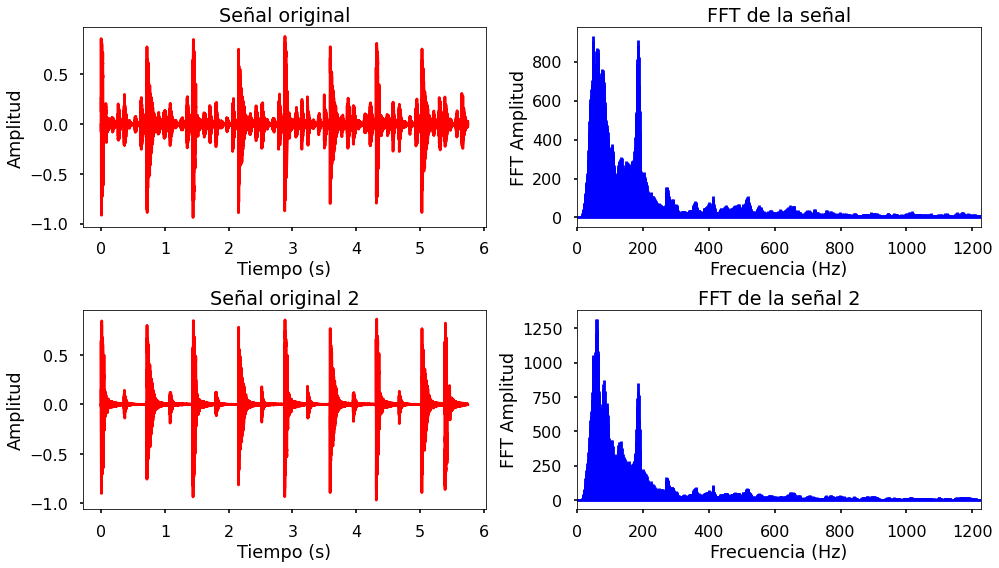

In [12]:
# Import de librerias
import numpy as np
import matplotlib.pyplot as plt
import librosa
from scipy.fftpack import fft, fftfreq, ifft, ifft2, ifftshift, fft2, fftshift

plt.style.use('seaborn-poster')
%matplotlib inline

audio_file_1 = "sonido1.wav"

signal_1, fs_1 = librosa.load(audio_file_1)

audio_file_2 = "sonido2.wav"
signal_2, fs_2 = librosa.load(audio_file_2)

fft_1 = fft(signal_1)

freqs_1 = fftfreq(len(signal_1), 1/fs_1) # frecuencia
ampls_1 = np.abs(fft_1) # amplitud

fft_2 = fft(signal_2)

freqs_2 = fftfreq(len(signal_2), 1/fs_2) # frecuencia
ampls_2 = np.abs(fft_2) # amplitud

t_1 = np.arange(len(signal_1)) / fs_1

t_2 = np.arange(len(signal_2)) / fs_2

plt.figure(figsize=(14,8))

plt.subplot(221)
plt.plot(t_1, signal_1, 'r')
plt.title('Señal original')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')

plt.subplot(222)
plt.stem(freqs_1, ampls_1, 'b', markerfmt=" ", basefmt="-b")
plt.title('FFT de la señal')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('FFT Amplitud')
plt.xlim(0, fs_1/18)

plt.subplot(223)
plt.plot(t_2, signal_2, 'r')
plt.title('Señal original 2')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')

plt.subplot(224)
plt.stem(freqs_2, ampls_2, 'b', markerfmt=" ", basefmt="-b")
plt.title('FFT de la señal 2')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('FFT Amplitud')
plt.xlim(0, fs_2/18)

plt.tight_layout()
plt.show()

In [14]:
from IPython.display import Audio, display
Audio("sonido1.wav")

In [15]:
Audio(np.real(ifft(fft_1)), rate=fs_1)

In [16]:
Audio("sonido2.wav")

In [17]:
Audio(np.real(ifft(fft_2)), rate=fs_2)

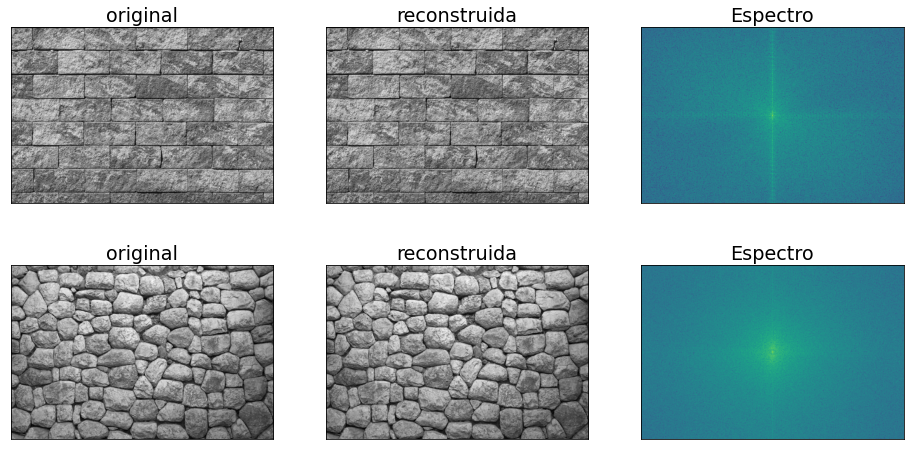

In [11]:
import cv2
import pylab as pl

img1 = cv2.imread('muro1.png', 0)
img2 = cv2.imread('muro2.png', 0)

f1 = fft2(img1)
f2 = fft2(img2)

fshift1 = fftshift(f1)
fshift2 = fftshift(f2)

magnitude_spectrum1 = 20*np.log(0.01 + np.abs(fshift1))
magnitude_spectrum2 = 20*np.log(0.01 + np.abs(fshift2))

img_reconstruida1 = ifft2(ifftshift(fshift1)).real
img_reconstruida2 = ifft2(ifftshift(fshift2)).real

plt.figure(figsize=(16,8))

pl.subplot(231), pl.imshow(img1, cmap='gray')
pl.title('original'), plt.xticks([]), plt.yticks([])
plt.subplot(232), plt.imshow(img_reconstruida1, cmap='gray')
plt.title('reconstruida'), plt.xticks([]), plt.yticks([])
pl.subplot(233), pl.imshow(magnitude_spectrum1)
pl.title('Espectro'), plt.xticks([]), plt.yticks([])

pl.subplot(234), pl.imshow(img2, cmap='gray')
pl.title('original'), plt.xticks([]), plt.yticks([])
plt.subplot(235), plt.imshow(img_reconstruida2, cmap='gray')
plt.title('reconstruida'), plt.xticks([]), plt.yticks([])
pl.subplot(236), pl.imshow(magnitude_spectrum2)
pl.title('Espectro'), plt.xticks([]), plt.yticks([])
pl.show()

Text(0, 0.5, '$y(t)$')

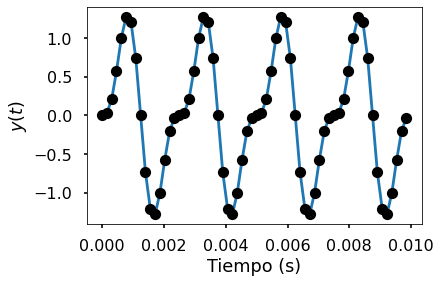

In [2]:

import matplotlib.pyplot as plt
import numpy as np
from numpy import pi
 
n = 2 ** 6 # Número de intervalos
f = 400.0 # Hz
dt = 1 / (f * 16) # Espaciado, 16 puntos por período
t = np.linspace(0, (n - 1) * dt, n) # Intervalo de tiempo en segundos
y = np.sin(2 * pi * f * t) - 0.5 * np.sin(2 * pi * 2 * f * t) # Señal
plt.plot(t, y)
plt.plot(t, y, 'ko')
plt.xlabel('Tiempo (s)')
plt.ylabel('$y(t)$')

TypeError: ignored

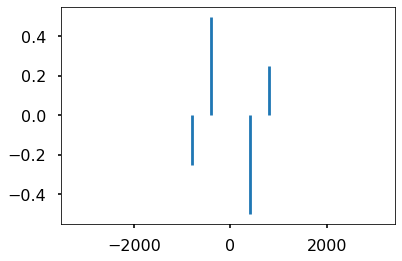

In [3]:

from scipy.fftpack import fft, fftfreq
 
Y = fft(y) / n # Normalizada
frq = fftfreq(n, dt) # Recuperamos las frecuencias
plt.vlines(frq, 0, Y.imag) # Representamos la parte imaginaria
plt.annotate(s=u'f = 400 Hz', xy=(400.0, -0.5), xytext=(400.0 + 1000.0, -0.5 - 0.35), arrowprops=dict(arrowstyle = "->"))
plt.annotate(s=u'f = -400 Hz', xy=(-400.0, 0.5), xytext=(-400.0 - 2000.0, 0.5 + 0.15), arrowprops=dict(arrowstyle = "->"))
plt.annotate(s=u'f = 800 Hz', xy=(800.0, 0.25), xytext=(800.0 + 600.0, 0.25 + 0.35), arrowprops=dict(arrowstyle = "->"))
plt.annotate(s=u'f = -800 Hz', xy=(-800.0, -0.25), xytext=(-800.0 - 1000.0, -0.25 - 0.35), arrowprops=dict(arrowstyle = "->"))
plt.ylim(-1, 1)
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Im($Y$)')

Text(0, 0.5, 'Im($Y_2$)')

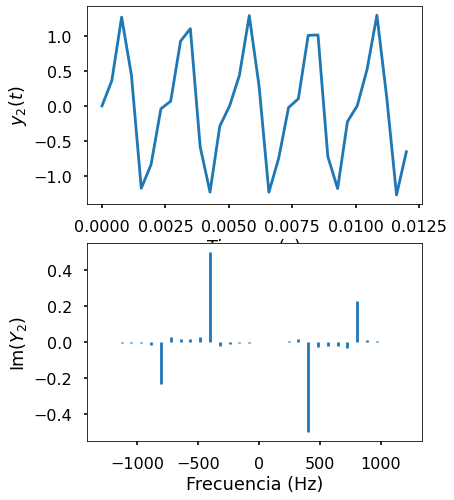

In [4]:

n2 = 2 ** 5
t2 = np.linspace(0, 0.012, n2) # Intervalo de tiempo en segundos
dt2 = t2[1] - t2[0]
y2 = np.sin(2 * pi * f * t2) - 0.5 * np.sin(2 * pi * 2 * f * t2) # Señal
Y2 = fft(y2) / n2 # Transformada normalizada
frq2 = fftfreq(n2, dt2)
fig = plt.figure(figsize=(6, 8))
ax1 = fig.add_subplot(211)
ax1.plot(t2, y2)
ax1.set_xlabel('Tiempo (s)')
ax1.set_ylabel('$y_2(t)$')
ax2 = fig.add_subplot(212)
ax2.vlines(frq2, 0, Y2.imag)
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Im($Y_2$)')

Text(0, 0.5, 'Im($Y_3$)')

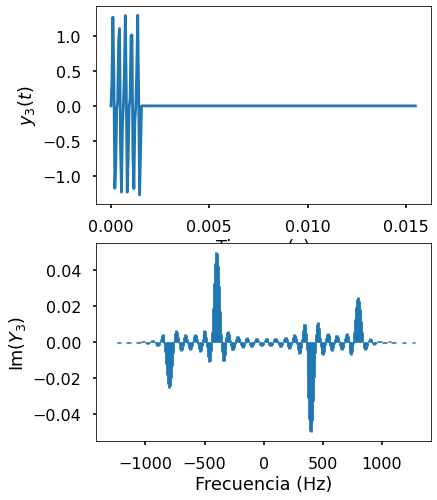

In [5]:

t3 = np.linspace(0, 0.012 + 9 * dt2, 10 * n2) # Intervalo de tiempo en segundos
y3 = np.append(y2, np.zeros(9 * n2)) # Señal
Y3 = fft(y3) / (10 * n2) # Transformada normalizada
frq3 = fftfreq(10 * n2, dt2)
fig = plt.figure(figsize=(6, 8))
ax1 = fig.add_subplot(211)
ax1.plot(t3, y3)
ax1.set_xlabel('Tiempo (s)')
ax1.set_ylabel('$y_3(t)$')
ax2 = fig.add_subplot(212)
ax2.vlines(frq3, 0, Y3.imag)
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Im($Y_3$)')

Text(0, 0.5, 'Abs($Y_5$)')

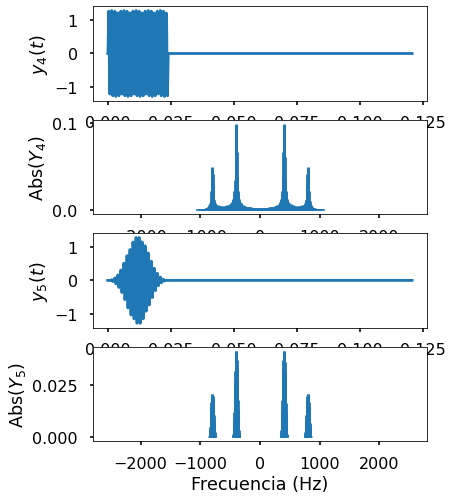

In [6]:

n4 = 2 ** 8
t4 = np.linspace(0, 0.05, n4)
dt4 = t4[1] - t4[0]
y4 = np.sin(2 * pi * f * t4) - 0.5 * np.sin(2 * pi * 2 * f * t4)
y5 = y4 * np.blackman(n4)
t4 = np.linspace(0, 0.12 + 4 * dt4, 5 * n4)
y4 = np.append(y4, np.zeros(4 * n4))
y5 = np.append(y5, np.zeros(4 * n4))
Y4 = fft(y4) / (5 * n4)
Y5 = fft(y5) / (5 * n4)
frq4 = fftfreq(5 * n4, dt4)
fig = plt.figure(figsize=(6, 8))
ax1 = fig.add_subplot(411)
ax1.plot(t4, y4)
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('$y_4(t)$')
ax2 = fig.add_subplot(412)
ax2.vlines(frq4, 0, abs(Y4)) # Espectro de amplitud
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Abs($Y_4$)')
ax3 = fig.add_subplot(413)
ax3.plot(t4, y5)
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('$y_5(t)$')
ax4 = fig.add_subplot(414)
ax4.vlines(frq4, 0, abs(Y5)) # Espectro de amplitud
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Abs($Y_5$)')

In [8]:

import matplotlib.pyplot as plt
import scikits.audiolab as audiolab
sound = audiolab.sndfile('Violin_for_spectrogram.ogg', 'read')
y = sound.read_frames(sound.get_nframes())
Pxx, freqs, bins, im = plt.specgram(y, NFFT=512, Fs=44100)
plt.xlim(0, len(y) / 44100.0)
plt.ylim(0, 22050.0)
plt.colorbar(im).set_label(u'Intensidad (dB)')
plt.xlabel(u'Tiempo (s)')
plt.ylabel(u'Frecuencia (Hz)')

ModuleNotFoundError: ignored